# COLLAPSE OF AN HOMOGENEUS SPHERE (WITH TREECODE)

## mi piacerebbe aggiungere:
- andamento analitico di r in funzione del tempo e confrontarlo con quello che vediamo
- energia potenziale
- sendity distribution ---> what is the gravitational potential??

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import math
#import sys
#!{sys.executable} -m pip install networkx
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
#%matplotlib notebook

In [11]:
N = 4096
G_p = 6.67*10**(-8)*u.cm**3/(u.g*u.s**2)
G_iu = 1

# radius:
r_iu = 1*u.pc
r_p1 = r_iu.to(u.cm)

# mass:
M_iu = 1*u.M_sun
M_p = M_iu.to(u.g)

# my values:
m_points = 3*M_iu
R_halo = 90*r_iu

# the density of the cluster is given by:
rho_iu = N*(m_points/M_iu)/((4*np.pi*(R_halo/r_iu)**3)/3)
rho_p1 = N*M_p/((4*np.pi*(R_halo.to(u.cm))**3)/3)

# compute the collapse time:
cost = np.sqrt(3*np.pi/32)
tc_iu = cost/np.sqrt(G_iu*rho_iu)
tc_p = cost/np.sqrt(G_p*rho_p1)

print("The mass of the stars - so my test particles - (in internal units) is: ", m_points/M_iu)
print("The radius of the cluster (in internal units) is: ", R_halo/r_iu)
print("The density of the cluster (in internal units) is: ", rho_iu)
print("The density of the cluster (in physical units) is: ", rho_p1)
print("The collapse time (in internal units) is: ", tc_iu)
print("The collapse time (in physical units) is: ", tc_p)

The mass of the stars - so my test particles - (in internal units) is:  3.0
The radius of the cluster (in internal units) is:  90.0
The density of the cluster (in internal units) is:  0.004024065721632119
The density of the cluster (in physical units) is:  9.078165272843711e-26 g / cm3
The collapse time (in internal units) is:  8.555158144631836
The collapse time (in physical units) is:  6974267728371413.0 s


In [29]:
N = 4096
tstop = 25 # collapse time
dtime = 0.1 # integration time
dtout = 1 # step output time
epsilon = 0.03

#n_outputs = math.floor(tstop / dtout)
#n_outputs = 52
#print(n_outputs)

# brute force 
n_outputs = 0

with open("treecode_out.txt", "r") as file:
    for line in file:
        if line.strip() == str(N):
            n_outputs += 1
print(n_outputs) 

if (n_outputs == 0):
    print("maybe N in this code is different from the number of bodies you simulated !!") 




101


In [13]:
# Reading masses from the output


data_time = np.empty(n_outputs)
with open("treecode_out.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(2):
            file.readline()
        
        data_iter_t = np.genfromtxt(file, max_rows=1)
        data_time[index] = data_iter_t
        index += 1
        
        for _ in range(3*N):
            file.readline()
            
data_mass = np.empty(N*n_outputs)

with open("treecode_out.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(3):
            file.readline()
        
        data_iter_m = np.genfromtxt(file, max_rows=N)
        data_mass[index:index+N] = data_iter_m
        index += N
        
        for _ in range(2*N):
            file.readline()

In [14]:
print (len(data_time))
print (data_time)

101
[ 0.          0.10000002  0.20000023  0.29999968  0.3999984   0.49999711
  0.59999585  0.69999456  0.79999328  0.89999199  0.9999907   1.0999954
  1.2         1.3000047   1.4000094   1.5000141   1.6000187   1.7000234
  1.8000281   1.9000328   2.0000374   2.1000302   2.2000229   2.3000157
  2.4000084   2.5000012   2.5999939   2.6999867   2.7999794   2.8999722
  2.999965    3.0999577   3.1999505   3.2999432   3.399936    3.4999287
  3.5999215   3.6999142   3.799907    3.8998997   3.9998925   4.0998855
  4.1998782   4.3008709   4.4008636   4.5008564   4.6008492   4.7008419
  4.8008347   4.9008274   5.0008202   5.1008129   5.2008057   5.3007984
  5.4007912   5.5007839   5.6007767   5.7007694   5.8007622   5.9007549
  6.0007477   6.1007404   6.2007332   6.3007259   6.4007187   6.5007114
  6.6007042   6.7006969   6.8006897   6.9006824   7.0006752   7.100668
  7.2006607   7.3006535   7.4006462   7.500639    7.6006317   7.7006245
  7.8006172   7.90061     8.0006027   8.1006432   8.2006836 

In [15]:
# Reading coordinates and velocities from the output

data_coordinates = []
data_velocities = []

with open("treecode_out.txt", "r") as file:
    for _ in range(n_outputs):
        for _ in range(3+N):
            file.readline()
            
        data_iter_c = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_coordinates.append(data_iter_c)
        data_iter_v = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_velocities.append(data_iter_v)
        
data_coordinates = np.concatenate(data_coordinates)
data_velocities = np.concatenate(data_velocities)

In [16]:
x = np.zeros(shape = len(data_coordinates))
y = np.zeros(shape = len(data_coordinates))
z = np.zeros(shape = len(data_coordinates))

vx = np.zeros(shape = len(data_velocities))
vy = np.zeros(shape = len(data_velocities))
vz = np.zeros(shape = len(data_velocities))

for i in range(len(data_coordinates)):
    x[i] = data_coordinates[i][0]
    y[i] = data_coordinates[i][1]
    z[i] = data_coordinates[i][2]
    
for i in range(len(data_velocities)):
    vx[i] = data_velocities[i][0]
    vy[i] = data_velocities[i][1]
    vz[i] = data_velocities[i][2]

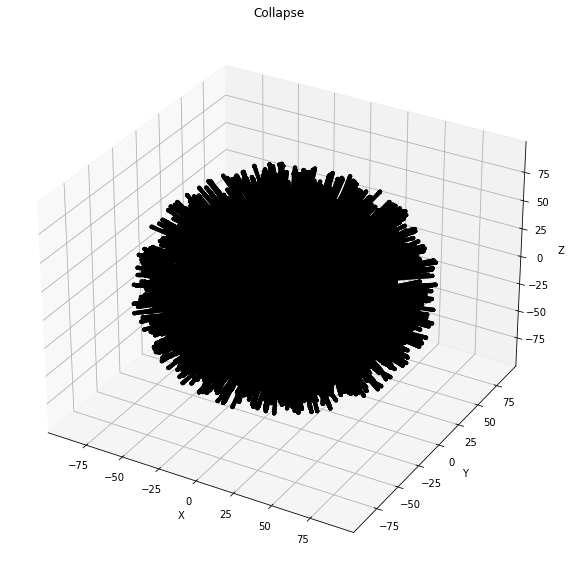

In [17]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color='black', s=10)
#ax.scatter(x[:N], y[:N], z[:N], color='blue')
ax.scatter(x[-N:], y[-N:], z[-N:], color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Collapse')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


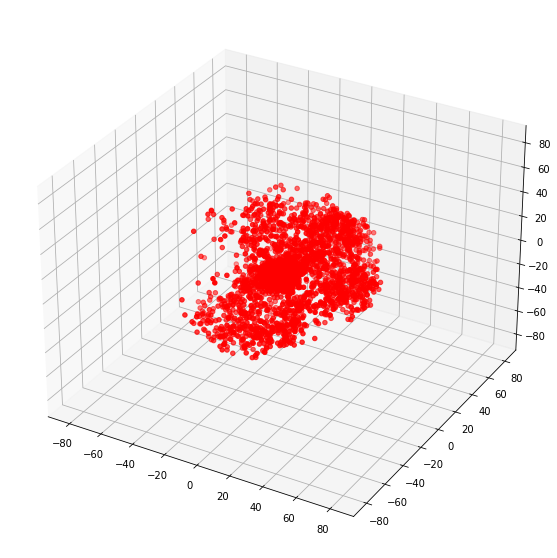

In [18]:
num_frames = len(data_coordinates) // N
#num_frames = n_outputs

def update(frame):
    start_idx = frame * N
    end_idx = (frame + 1) * N
    scat._offsets3d = (x[start_idx:end_idx], y[start_idx:end_idx], z[start_idx:end_idx])
    return scat,

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x[:N], y[:N], z[:N], c='r', marker='o')

ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(-90,90)

ani = FuncAnimation(fig, update, frames=num_frames, interval=200)
ani.save('prova1.gif', writer='imagemagick', fps=10)

plt.show()

# cose Malvi boh

In [19]:
# write x_evolution, yev, z_ev.......
#matrice con n_bodies righe e la posizione x del relativo bodie sulla colonna
# x[t*N:(1+t)*N] 

print(x.shape, y.shape, z.shape, num_frames)
x_evolution = np.empty((N, num_frames))
y_evolution = np.empty((N, num_frames))
z_evolution = np.empty((N, num_frames))
v_x_evolution = np.empty((N, num_frames))
v_y_evolution = np.empty((N, num_frames))
v_z_evolution = np.empty((N, num_frames))

t = 0
n = 0
for t in range(num_frames):
    
    for n in range(N):
        #print(n)
        x_evolution[n][t] = x[n + t*N]
        y_evolution[n][t] = y[n + t*N]
        z_evolution[n][t] = z[n + t*N]
        v_x_evolution[n][t] = vx[n + t*N]
        v_y_evolution[n][t] = vy[n + t*N]
        v_z_evolution[n][t] = vz[n + t*N]
        
print(x.shape)


(413696,) (413696,) (413696,) 101
(413696,)


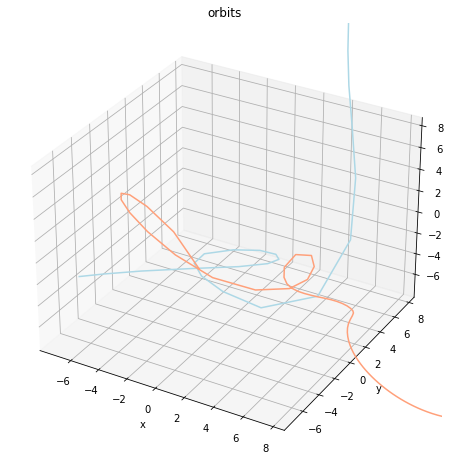

In [32]:
#PLOTTING JUST THE FIRST TWO TO SEE IF IT MAKES SENSE


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

#IF I WANT POINTS:

#ax.scatter(x_evolution[0][:],y_evolution[0][:],z_evolution[0][:], color = 'lightseagreen')
#ax.scatter(x_evolution[1][:],y_evolution[1][:], z_evolution[1][:], color = 'coral')

#IF I WANT THE PLOT OF THE ORBITS
ax.plot(x_evolution[0], y_evolution[0], z_evolution[0], label='1', color = 'lightblue')
ax.plot(x_evolution[1], y_evolution[1], z_evolution[1], label='2', color = 'lightsalmon')
#plt.plot(x3, y3, label='3', color = 'blue')


ax.set_title('orbits')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
#ax.grid(True)
#ax.legend()
ax.set_xlim(min(x_evolution[0]),max(x_evolution[0]))
ax.set_ylim(min(x_evolution[0]),max(x_evolution[0]))
ax.set_zlim(min(x_evolution[0]),max(x_evolution[0]))

plt.show()



#MAYBE I SHOULD DO IT IN 3D

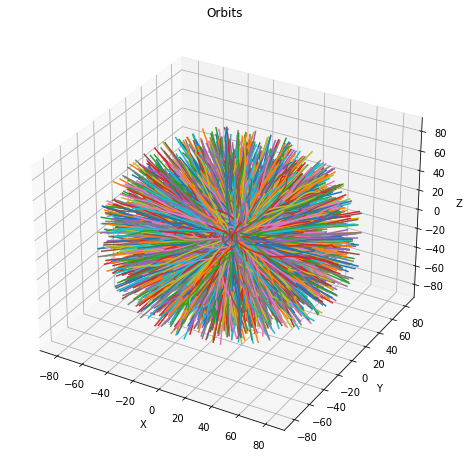

"\nplt.figure(figsize=(10, 8))\n\nfor n in range(n_bodies):\n    #IF I WANT POINTS:\n    #plt.scatter(x[n][:],y[n][:])\n    #IF I WANT THE PLOT OF THE ORBITS\n    plt.plot(x[n], y[n])\n\nplt.title('orbits')\nplt.xlabel('x')\nplt.ylabel('y')\n#plt.gca().set_aspect('equal', adjustable='box')\nplt.grid(True)\n#plt.legend()\nplt.show()\n"

In [35]:
#ALL THE ORBITS


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for orbit_x, orbit_y, orbit_z in zip(x_evolution, y_evolution, z_evolution):
    ax.plot(orbit_x, orbit_y, orbit_z)

ax.set_title('Orbits')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(-90,90)
plt.show()


'''
plt.figure(figsize=(10, 8))

for n in range(n_bodies):
    #IF I WANT POINTS:
    #plt.scatter(x[n][:],y[n][:])
    #IF I WANT THE PLOT OF THE ORBITS
    plt.plot(x[n], y[n])

plt.title('orbits')
plt.xlabel('x')
plt.ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
#plt.legend()
plt.show()
'''

(4096, 101)
I plotted the density over radii, just to see how it goes, we could do two different plots since they have different units


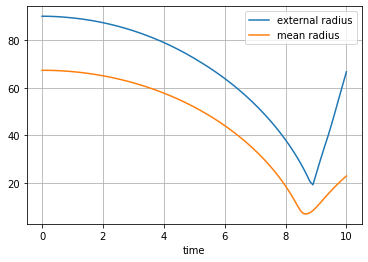

In [22]:
#I want to do a matrix with the radii of each n particle at each time
#x[0][:] is all the positions of the body 0

#print(x[0][:])
#print((x[0][:])**2)
#print((x**2).shape)
r_evolution = np.empty((N, num_frames))
r_evolution = np.sqrt(x_evolution**2 + y_evolution**2 + z_evolution**2)
print(r_evolution.shape)
#external r for each timelapse.... NON MI CONVINCE TROPPO USARE QUESTO PER LA DENSITÀ... PERCHÈ MI PRENDE LA PARTICELLE CHE SCAPPANO
r_ext = np.max(r_evolution, axis = 0)
r_mean = np.mean(r_evolution, axis = 0)
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_ext)**3 )
rho_evolution_mean = N * data_mass[0] / (4/3 * np.pi * (r_mean)**3 )


plt.plot(data_time, r_ext, label = 'external radius')
plt.plot(data_time, r_mean, label = 'mean radius')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()

print("I plotted the density over radii, just to see how it goes, we could do two different plots since they have different units")



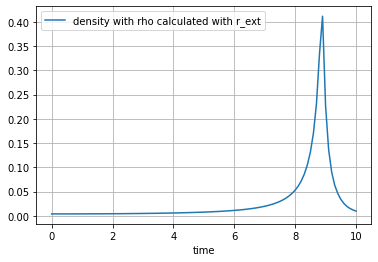

In [36]:
plt.plot(data_time, rho_evolution, label = 'density with rho calculated with r_ext')
#plt.plot(data_time, rho_evolution_mean, label = 'density with rho calculated with r_mean')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()


# rho evolution, but not the mean rho !!

## this is the mean rho i think

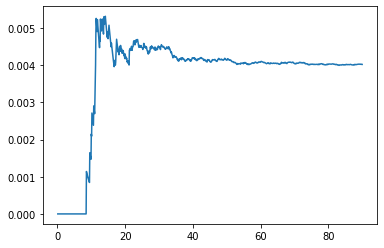

89.99531558149728


In [24]:
#let's do the first one first
radii = np.linspace(0.1, r_ext[0], 1000)
density= []
for R in radii:
    i = 0
    for r_p in r_evolution[:,0]:    
        if (r_p <= R):
            i = i+1
    density.append(i * data_mass[0] / (4/3 * np.pi * R**3)) 
#plt.hist(density,int(n_bodies**0.5))
plt.show()
plt.plot(radii, density)

plt.show()
print(r_ext[0])

# we count them, so for a litte number of particles might scatter the distributionn because of the poissonian error ( proportinal to sqrt(N))

## let's compare the collapse time with the actual moment of collapse we see

In [25]:
# time at which I see the collapse

collapse_t_simul = data_time[np.argmin(r_mean)]
print("time at which I see the collapse: ", collapse_t_simul, "\n collapse time we have calculated: ", tc_iu)

time at which I see the collapse:  8.6998854 
 collapse time we have calculated:  8.555158144631836


# Analytic evolution of r in function of time

# Gravitational potential

The gravitational potential of a shell of mass within the sphere is:

$$ \Phi (x) = \frac {- G M_{shell}}{r} $$

while on a point outside the shell the force from the shelll is equal to that exerted by the same mass placed in the centre:

$$ \Phi (r) = \frac {- G M_{shell}}{r_{particle}} $$

## so summing all the shells:

$$ \Phi (r) = - 4 \pi G \left[ \frac{1}{r} \int_{0}^{r} - \rho (r') r'^2 dr' +  \int_{r}^{\infty} \rho (r') \frac{r'^2}{r'} dr' \right]$$

if r > a easy!! ---> only get the contribution within a
$$ \Phi (r) = \frac {-  4 \pi G\rho_0 a^3}{3 r} $$

if r < a
$$ \Phi (r) = - 2 \pi G \rho_0 \left[ a^2 - \frac{1}{3} r^2 \right]$$




In [37]:
def analytic_homogeneus_sphere_potential(rho_0_iu, r):
        if(r<a):
            return -2*np.pi*rho_0_iu*G_iu* (a**2-(1/3)*r**2)
        else:
            return -((4/3)*np.pi*rho_0_iu*G_iu*a**3)/r
    

# Dynamical evolution of the truncted homogeneus sphere

$$ a(r) = \frac {-  4 G M(r)}{r^2}  = \frac {-  4 \pi G\rho_0 r}{3 } $$

it should be scale invariant!

THE MASS WITHIN THE POSITION OF A GIVEN PARTICLE STAYS THE SAME AT ANY TIME

$$ M(r(t)) = M(r_0) $$


Multiplying a = $\frac{d^2 r}{dt^2}$ by $\dot r$ one gets:

$$ \frac{dr}{dt} = - \sqrt{2GM_0} \sqrt{\frac{1}{r} - \frac{1}{r_0}} $$

then one substittutes $y = \frac{r}{r_0} $ and integrates between: 

1 and 0 in r ---> 0 and t_collapse in time  ---> if one wants to get the collapse time

1 and r/r_0 to have fot time between 0 and t ----> AND GET r(t)



## I could actually get t(r) and then we can swap the axis and see r(t) (????) (the function looks invertible)

$$\frac{1}{2} \left( arcsin(\sqrt{\frac{r}{r_0}}) - \sqrt{\frac{r}{r_0}(1-\frac{r}{r_0} )} - \frac{\pi}{2} \right) = -\sqrt{\frac {8 \pi G\rho_0 r}{3 }} t $$

not sure about the 1/2 in front, my resolution of the integral doesn't have it !

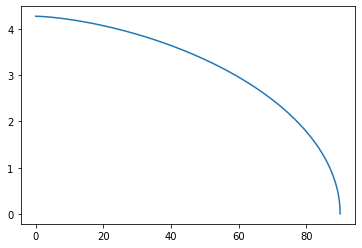

In [119]:
r_0 = float (R_halo/r_iu)
r_th = np.linspace(0, r_0, 1000)
rho_0 = rho_iu

#print((np.arcsin(np.sqrt(r_th/r_0))).shape, (np.sqrt((r_th/r_0) * (1 - r_th/r_0))).shape )

time = -1 / np.sqrt((8 * np.pi * G_iu * rho_0) / 3) * (0.5 * (np.arcsin(np.sqrt(r_th / r_0)) - np.sqrt((r_th / r_0) * (1 - (r_th / r_0))) - (np.pi / 2)))

plt.plot(r_th, time)


## let's swap the axis

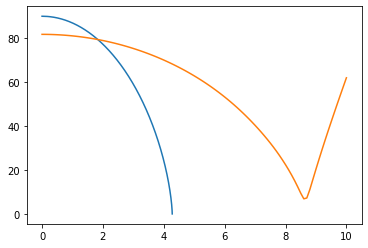

In [123]:
plt.plot(time, r_th)
plt.plot(data_time, r_evolution[3])

# simulazione come giacomazzo

FileNotFoundError: [Errno 2] No such file or directory: './images_treecode/fig_t0.png'

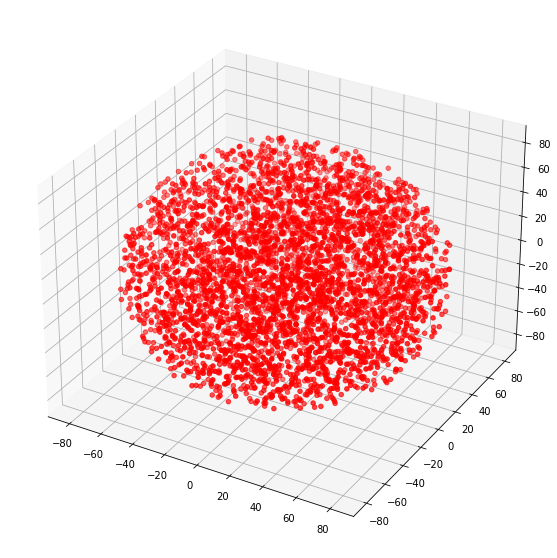

In [33]:
for t in range(num_frames):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    scat = ax.scatter(x[t*N:(1+t)*N], y[t*N:(1+t)*N], z[t*N:(1+t)*N], c='r', marker='o')

    ax.set_xlim(-90,90)
    ax.set_ylim(-90,90)
    ax.set_zlim(-90,90)
    
    plt.savefig('./images_treecode/fig_t'+str(t)+'.png', dpi=200)
    plt.close()


In [ ]:
import os

# set the directory where your images are stored
directory = "./images_treecode/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

In [ ]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_treecode/'+file)
        writer.append_data(image)
        
files=[]
